<a href="https://colab.research.google.com/github/Manu-Gr/Text-Mining-Amazon-Reviews-/blob/main/Amazon_Reviews_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91890\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91890\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91890\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Problem Understanding
* Extract Reviews of any product from E-Commerce websites like Amazon, flipkart
* Perform Sentimental Analysis

### 2.Data Collection and Description

#### 2.1 Connecting to Amazon and Downloading Reviews

In [ ]:
oneplus_reviews = []

In [ ]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

#### 2.2 Downloading Reviews from Amazon.in for Oneplus 7 

In [ ]:
oneplus_reviews = list(set(oneplus_reviews))

#### 2.3 Cleaning the text

In [ ]:
txt_upd = ' '.join(oneplus_reviews)

In [ ]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [ ]:
text_tokens = word_tokenize(txt_upd)

In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

#### 2.4 Create DataFrame

In [ ]:
tf = TfidfVectorizer()

In [ ]:
text_tf = tf.fit_transform(tokens_without_sw)

In [ ]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,...,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_list = ' '.join(df)

In [ ]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

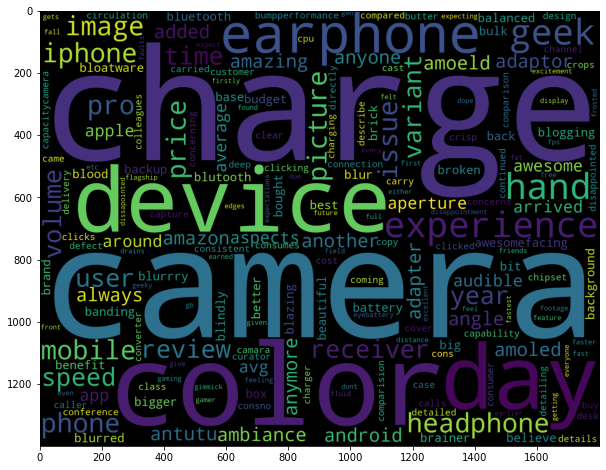

In [ ]:
plt.figure(figsize=(14,8))
plt.imshow(wordcloud)
plt.show()

### 3. Sentimental Analysis

In [ ]:
with open(r'D:\Study Materials\ExcelR\Data Science\Assignments\Text Mining\positive-words.txt') as pw:
    positive_words = pw.read().split("\n")

In [ ]:
positive_words = positive_words[35:]

In [ ]:
with open(r'D:\Study Materials\ExcelR\Data Science\Assignments\Text Mining\negative-words.txt') as nw:
    negative_words = nw.read().split("\n")

In [ ]:
negative_words = negative_words[35:]

In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [ ]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

### 4. Conclusion

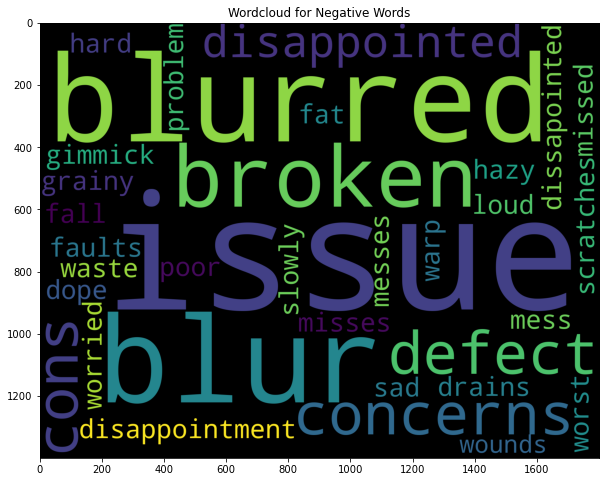

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Wordcloud for Negative Words')
plt.imshow(wordcloud_neg)
plt.show()

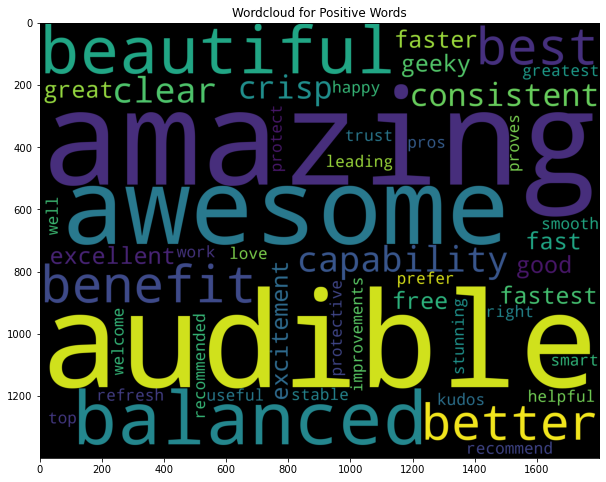

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Wordcloud for Positive Words')
plt.imshow(wordcloud_pos)
plt.show()